# Lab 3 - Séries temporais

In [1]:
install.packages('tseries')
library(tseries)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
install.packages("FitAR")
library(FitAR)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘iterators’, ‘foreach’, ‘glmnet’, ‘grpreg’, ‘pls’, ‘leaps’, ‘ltsa’, ‘bestglm’

Loading required package: lattice
Loading required package: leaps
Loading required package: ltsa
Loading required package: bestglm


In [3]:
install.packages("forecast")
library(forecast)


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Attaching package: ‘forecast’

The following object is masked from ‘package:FitAR’:

    BoxCox



### Tarefa 7.1

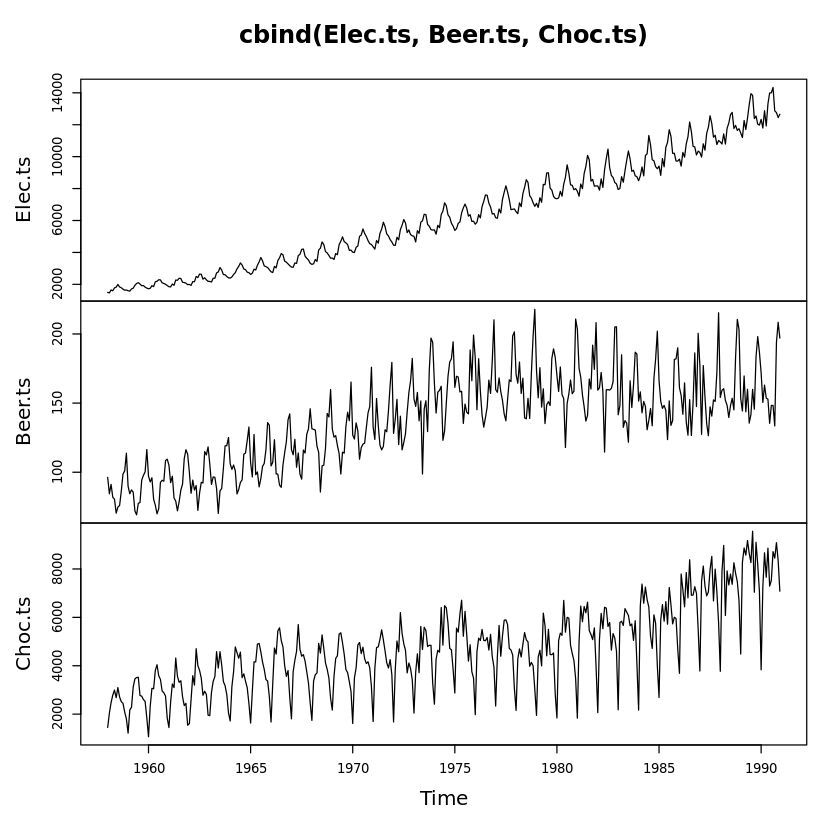

In [17]:
library(data.table)

CBE <- fread('https://filebin.net/srmzerpytme7pdlg/CBE.txt?t=5d1wl8jp', header = T)
#CBE <- read.table('https://ae4.tidia-ae.usp.br/access/content/group/d9eaaa2c-4085-4503-8e32-4bc0279da0d1/CBE.txt', header = T)
#edit(CBE)

Elec.ts <- ts(CBE[,3], start = 1958, freq = 12)
Beer.ts <- ts(CBE[,2], start = 1958, freq = 12)
Choc.ts <- ts(CBE[,1], start = 1958, freq = 12)

plot(cbind(Elec.ts, Beer.ts,Choc.ts))

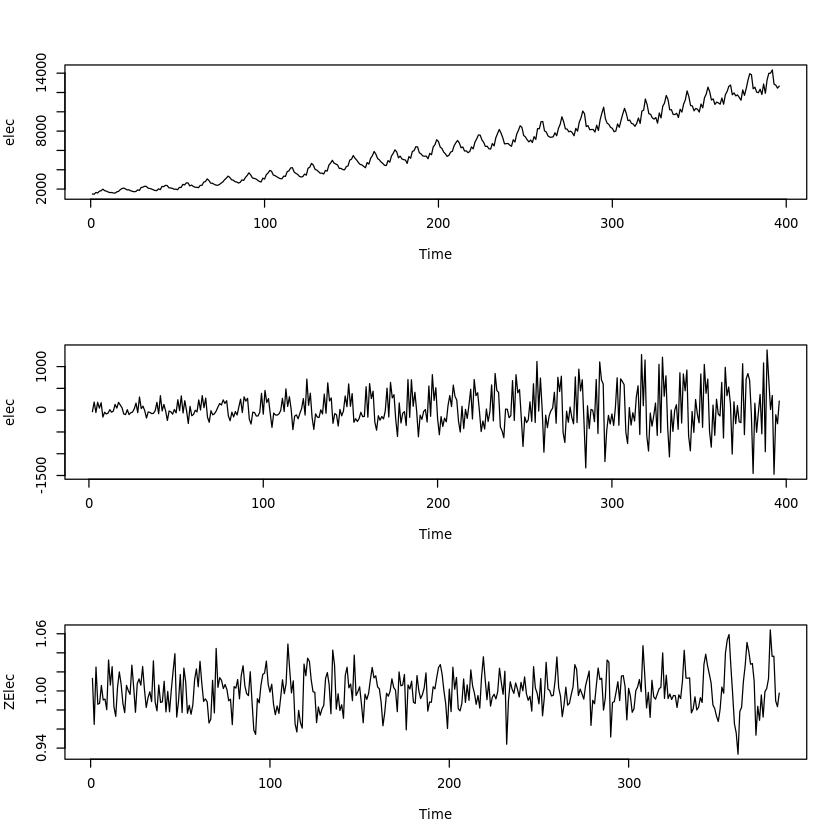

In [22]:
Elec.decom <- decompose(Elec.ts, type="mult")

Elec.Trend <- Elec.decom$trend
Elec.Seasonal <- Elec.decom$seasonal
Elec.random  <- Elec.decom$random

ZElec  <- ts(Elec.random[7:390])

layout(1:3)
plot(ts(Elec.ts))
plot(diff(ts(Elec.ts)))
plot(ZElec)

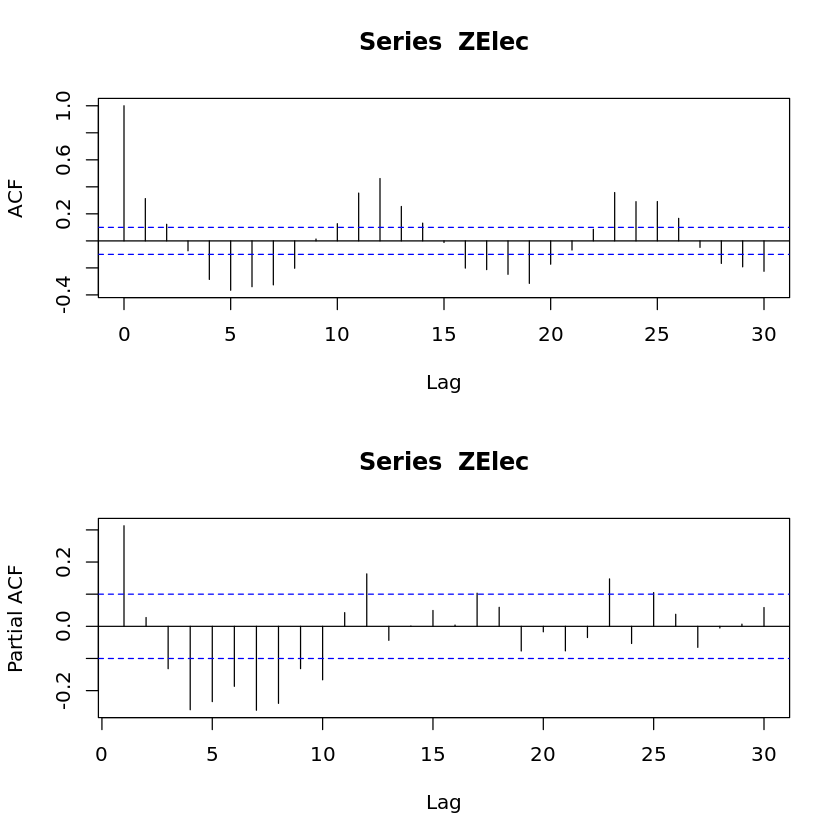

In [23]:
layout(1:2)
acf(ZElec, lag.max = 30)
pacf(ZElec, lag.max = 30)

In [24]:
fit1 <- arima(ZElec, order = c(1, 0, 1))
fit2 <- arima(ZElec, order = c(1, 0, 0))
fit3 <- arima(ZElec, order = c(2, 0, 0))

BIC(fit1, fit2, fit3)

,df,BIC
,<dbl>,<dbl>
fit1,4,-1929.588
fit2,3,-1935.400
fit3,4,-1929.716


In [25]:
arima(ZElec, order = c(1, 0, 0))


Call:
arima(x = ZElec, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.3124     1.0000
s.e.  0.0484     0.0014

sigma^2 estimated as 0.0003617:  log likelihood = 976.63,  aic = -1947.25

In [26]:
arima(ZElec, order = c(1, 0, 1))


Call:
arima(x = ZElec, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.3513  -0.0431     1.0000
s.e.  0.1116   0.1136     0.0014

sigma^2 estimated as 0.0003616:  log likelihood = 976.7,  aic = -1945.39

In [27]:
arima(ZElec, order = c(2, 0, 0))


Call:
arima(x = ZElec, order = c(2, 0, 0))

Coefficients:
        ar1     ar2  intercept
      0.304  0.0265     1.0000
s.e.  0.051  0.0512     0.0014

sigma^2 estimated as 0.0003614:  log likelihood = 976.76,  aic = -1945.52

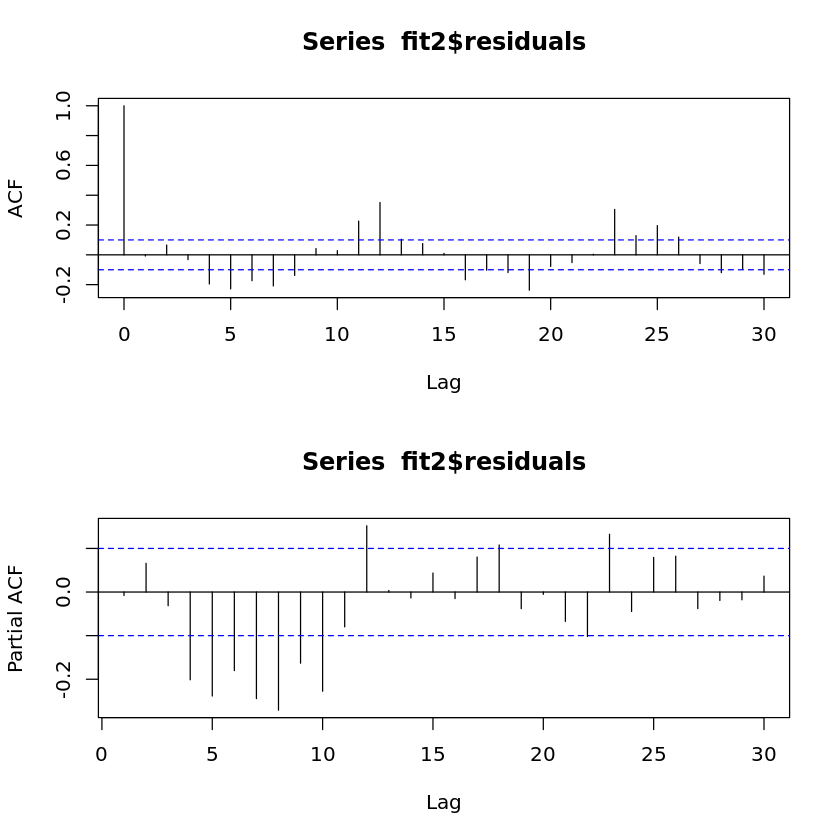

In [28]:
layout(1:2)
acf(fit2$residuals, lag.max = 30)
pacf(fit2$residuals, lag.max = 30)

$pred
Time Series:
Start = 385 
End = 390 
Frequency = 1 
[1] 0.9992622 0.9997471 0.9998985 0.9999459 0.9999606 0.9999653

$se
Time Series:
Start = 385 
End = 390 
Frequency = 1 
[1] 0.01901801 0.01992448 0.02001075 0.02001915 0.02001997 0.02002005

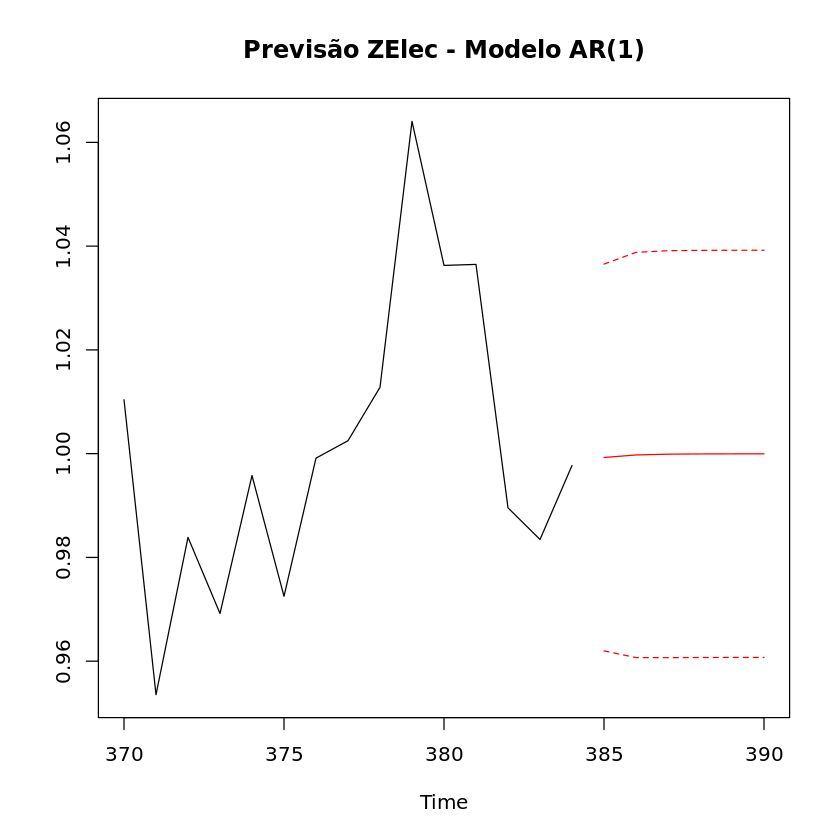

In [31]:
# For time-series prediction, 
# predict.ar, predict.Arima, predict.arima0, # # predict.HoltWinters, 
# predict.StructTS. 

prev<-predict(fit2,6)

#par(mfrow=c(1,2))
ts.plot(window(ZElec, start=370),main='Previsão ZElec - Modelo AR(1)',
prev$pred,
prev$pred+1.96*prev$se,
prev$pred-1.96*prev$se,
col=c(1,2,2,2), lty=c(1,1,2,2))
prev

    Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
385      0.9992622 0.9748897 1.023635 0.9619876 1.036537
386      0.9997471 0.9742128 1.025281 0.9606958 1.038798
387      0.9998985 0.9742537 1.025543 0.9606782 1.039119
388      0.9999459 0.9742903 1.025601 0.9607091 1.039183
389      0.9999606 0.9743040 1.025617 0.9607222 1.039199
390      0.9999653 0.9743085 1.025622 0.9607267 1.039204

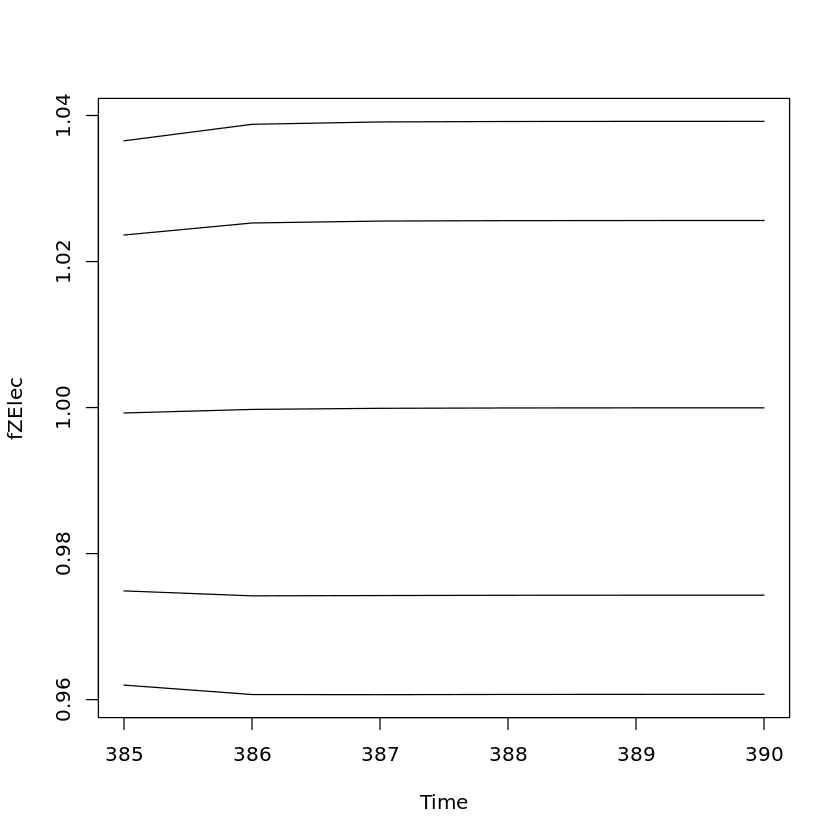

In [30]:

# Pacote de previsão alternativo

library(forecast)
fZElec=forecast(fit2, h=6)

fZElec
ts.plot(fZElec)

# Análise de Séries Temporais com R

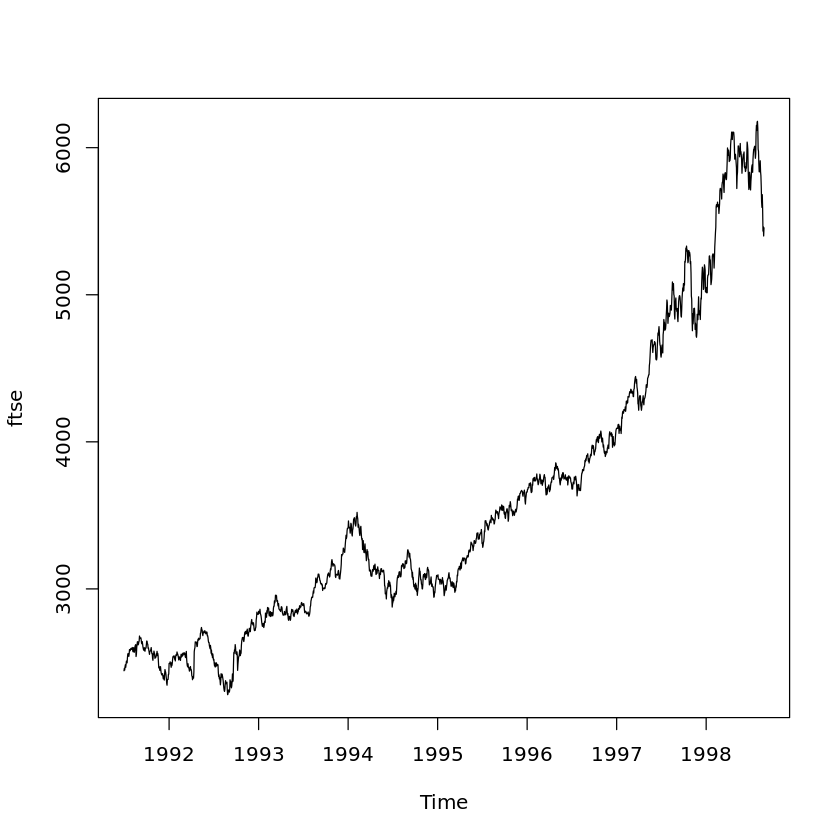

In [33]:
data(EuStockMarkets)
ftse=(EuStockMarkets[,4])
plot(ftse)